In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [27]:
# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice.
unique_mice = mouse_merged["Mouse ID"].unique()
num_mice = len(unique_mice)
print(num_mice)

249


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_merged[(mouse_merged.duplicated() == True)]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df = mouse_merged.set_index("Mouse ID")
mouse_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = mouse_df.drop(["g989"])
df = df.reset_index()
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = df["Mouse ID"].unique()
num_mice2 = len(unique_mice2)
print(num_mice2)

248


In [33]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = df.groupby("Drug Regimen")

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_vol_mean = drug_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_df["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_df["Tumor Volume (mm3)"].var()
tumor_vol_std = drug_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = drug_df["Tumor Volume (mm3)"].sem()

drug_summary_df = pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_var,
    "Standard Deviation": tumor_vol_std,
    "Standard Error of Mean": tumor_vol_sem,
})
drug_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary2 = drug_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
drug_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Readings')

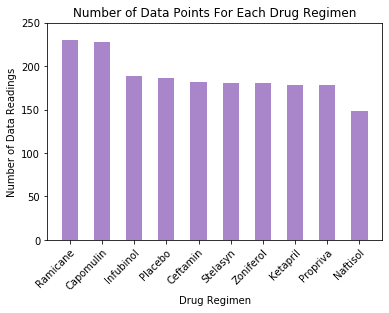

In [10]:
# Bar and Pie Charts
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regs = df["Drug Regimen"].unique()
drug_timepoint = df["Drug Regimen"].value_counts().plot.bar(color="C4", alpha=0.8)

drug_timepoint.set_ylim(0, 250)
drug_timepoint.set_xlim(-0.7,9.7)
drug_timepoint.set_title("Number of Data Points For Each Drug Regimen")
drug_timepoint.set_xlabel("Drug Regimen")
drug_timepoint.set_xticklabels(drug_regs,rotation=45, rotation_mode="anchor", ha="right", wrap=True)
drug_timepoint.set_ylabel("Number of Data Readings")

Text(0, 0.5, 'Number of Data Readings')

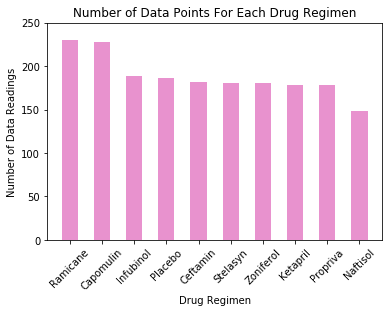

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = df["Drug Regimen"].value_counts()

plt.bar(drug_regs, timepoint, color='C6', alpha=0.8, align="center", width = 0.5)
plt.ylim(0,250)
plt.xlim(-0.7,9.7)
plt.xticks(rotation=45)
plt.title("Number of Data Points For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Readings")

In [12]:
num_male = df.loc[df["Sex"] == "Male"]
num_female = df.loc[df["Sex"] == "Female"]
num = [len(num_male), len(num_female)]

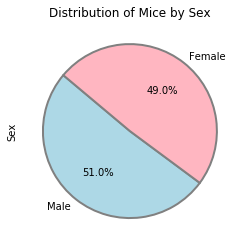

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = df["Sex"].value_counts()
colors = ["lightblue", "lightpink"]
pie_plot = sex_count.plot.pie(autopct="%1.1f%%", startangle=140, title="Distribution of Mice by Sex", colors=colors,
            wedgeprops={"edgecolor":"grey",'linewidth': 2, 'antialiased': True})

([<matplotlib.patches.Wedge at 0x1a1fcde588>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

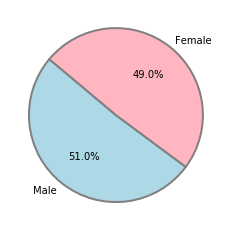

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(
    num, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140,
    wedgeprops={"edgecolor":"grey",'linewidth': 2, 'antialiased': True}
)

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouseid = pd.DataFrame(df.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_mouse_df = pd.merge(df, mouseid, on="Mouse ID")
new_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [39]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Using dictionary to store values
iqr_dict = {
    "Drug": [],
    "IQR": [],
    "UB": [],
    "LB": [],
    "Outliers": [],
}

# Locate the rows which contain mice on each drug
for drug in drugs:
    # sort by drug
    drug1 = new_mouse_df.loc[new_mouse_df["Drug Regimen"] == drug]
    
    # locate the row where timepoint is the last timepoint
    drug2 = drug1.loc[drug1["Timepoint_x"] == drug1["Timepoint_y"]]
    
    # declare tumor volume value
    tv = drug2["Tumor Volume (mm3)"]
    
    # append tumor volume to tumor_vol list
    tumor_vol.append(tv)
    
    # determine quartiles and IQR
    quartiles = tv.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # determine upper and lower bound to check for outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # append dictionary to track IQR and UB/LB for each drug
    iqr_dict["Drug"].append(drug)
    iqr_dict["IQR"].append(iqr)
    iqr_dict["UB"].append(upper_bound)
    iqr_dict["LB"].append(lower_bound)

    outliers = (tv.loc[(drug2["Tumor Volume (mm3)"] >= upper_bound) | (drug2["Tumor Volume (mm3)"] <= lower_bound)]).count()
    iqr_dict["Outliers"].append(outliers)
    if int(outliers) > 0:   
        print(f'There are {outliers} outlier(s) in {drug}')

# create DataFrame from dictionary
iqr_df = pd.DataFrame(iqr_dict)
iqr_df.set_index("Drug")

There are 1 outlier(s) in Infubinol


,IQR,UB,LB,Outliers
Drug,,,,
Capomulin,7.781863,51.832015,20.704562,0
Ramicane,9.098537,54.306811,17.912664,0
Infubinol,11.477135,82.741446,36.832905,1
Ceftamin,15.577752,87.666458,25.355450,0


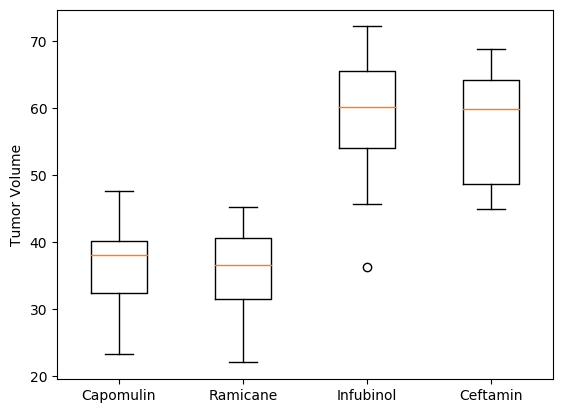

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(
    tumor_vol, 
    labels=drugs, 
)
plt.ylabel("Tumor Volume")
plt.style.use("default")
plt.show()

Text(0, 0.5, 'Tumor Volume')

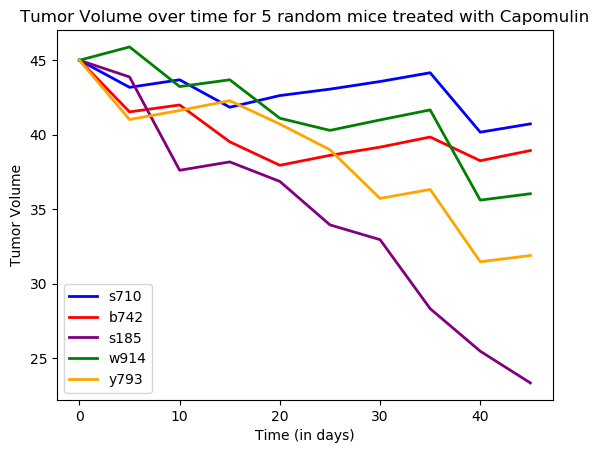

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# sort by mice that received Capomulin treatment
capo = new_mouse_df.loc[new_mouse_df["Drug Regimen"] == "Capomulin"]
capo_mice = capo["Mouse ID"].unique()

# choose 5 random mice, collect their respective data, store in lists
capo_mouse = random.choices(capo_mice, k=5)
capo_tv = []
capo_time = []
capo_name = []
for mouse in capo_mouse:
    capo_m = new_mouse_df.loc[new_mouse_df["Mouse ID"] == mouse]
    capo_name.append(mouse)
    capo_tumor_volume = capo_m["Tumor Volume (mm3)"]
    capo_tv.append(capo_tumor_volume)
    capo_timepoint = capo_m["Timepoint_x"]
    capo_time.append(capo_timepoint)
    
# store colors for plots
colors = ["blue","red","purple","green","orange"]
# plot each mouse on same plot
plt.plot(capo_time[0],capo_tv[0],label = capo_name[0],color = colors[0],linewidth=2,markersize=6,)
plt.plot(capo_time[1],capo_tv[1],label = capo_name[1],color = colors[1],linewidth=2,markersize=6,)
plt.plot(capo_time[2],capo_tv[2],label = capo_name[2],color = colors[2],linewidth=2,markersize=6,)
plt.plot(capo_time[3],capo_tv[3],label = capo_name[3],color = colors[3],linewidth=2,markersize=6,)
plt.plot(capo_time[4],capo_tv[4],label = capo_name[4],color = colors[4],linewidth=2,markersize=6,)

plt.legend()
plt.title('Tumor Volume over time for 5 random mice treated with Capomulin')
plt.xlabel("Time (in days)")
plt.ylabel("Tumor Volume")
# run cell again to regenerate plot

Text(0, 0.5, 'Average Tumor Volume (mm3)')

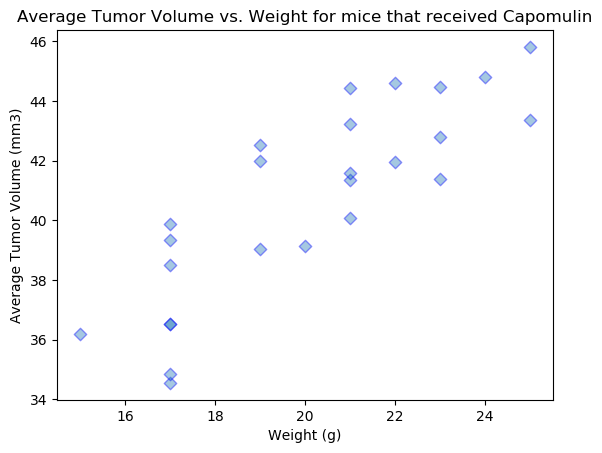

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tv = []
weight = []
for mouse in capo_mice:
    capo_m = capo.loc[capo["Mouse ID"] == mouse]
    tumorvol = capo_m["Tumor Volume (mm3)"].mean()
    avg_tv.append(tumorvol)
    g = capo_m["Weight (g)"].mean()
    weight.append(g)
# plot
plt.scatter(
    weight,avg_tv,s=40,marker="D",alpha=0.4,linewidths=1,edgecolors="b",
)
plt.title("Average Tumor Volume vs. Weight for mice that received Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight, avg_tv)
print(f'The correlation between weight and avg tumor volume:')
print(f'r = {round(correlation[0],2)}')

The correlation between weight and avg tumor volume:
r = 0.84


Text(21, 36.5, 'y = 0.95x + 21.55')

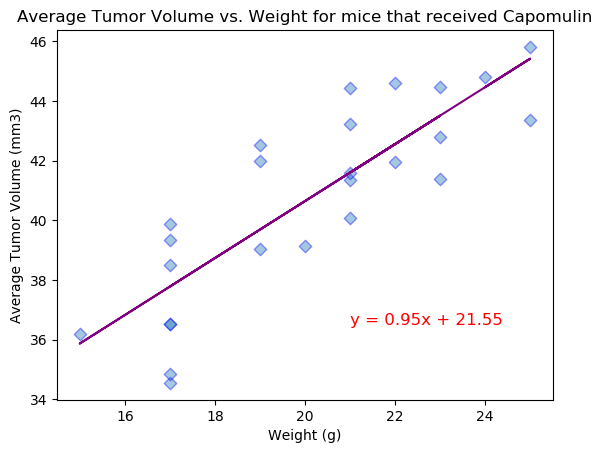

In [47]:
# linear regression
x = weight
y = avg_tv
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = np.array(x) * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(
    weight,avg_tv,s=40,marker="D",alpha=0.4,linewidths=1,edgecolors="b",
)
plt.title("Average Tumor Volume vs. Weight for mice that received Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(x,regress_values,c="purple")
plt.annotate(line,(21,36.5),fontsize=12,color="red")